# 非線性分類(Non-linear Classification)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt
import math

##### 設定我們有100個點，其中50個是圈圈，50個是叉叉

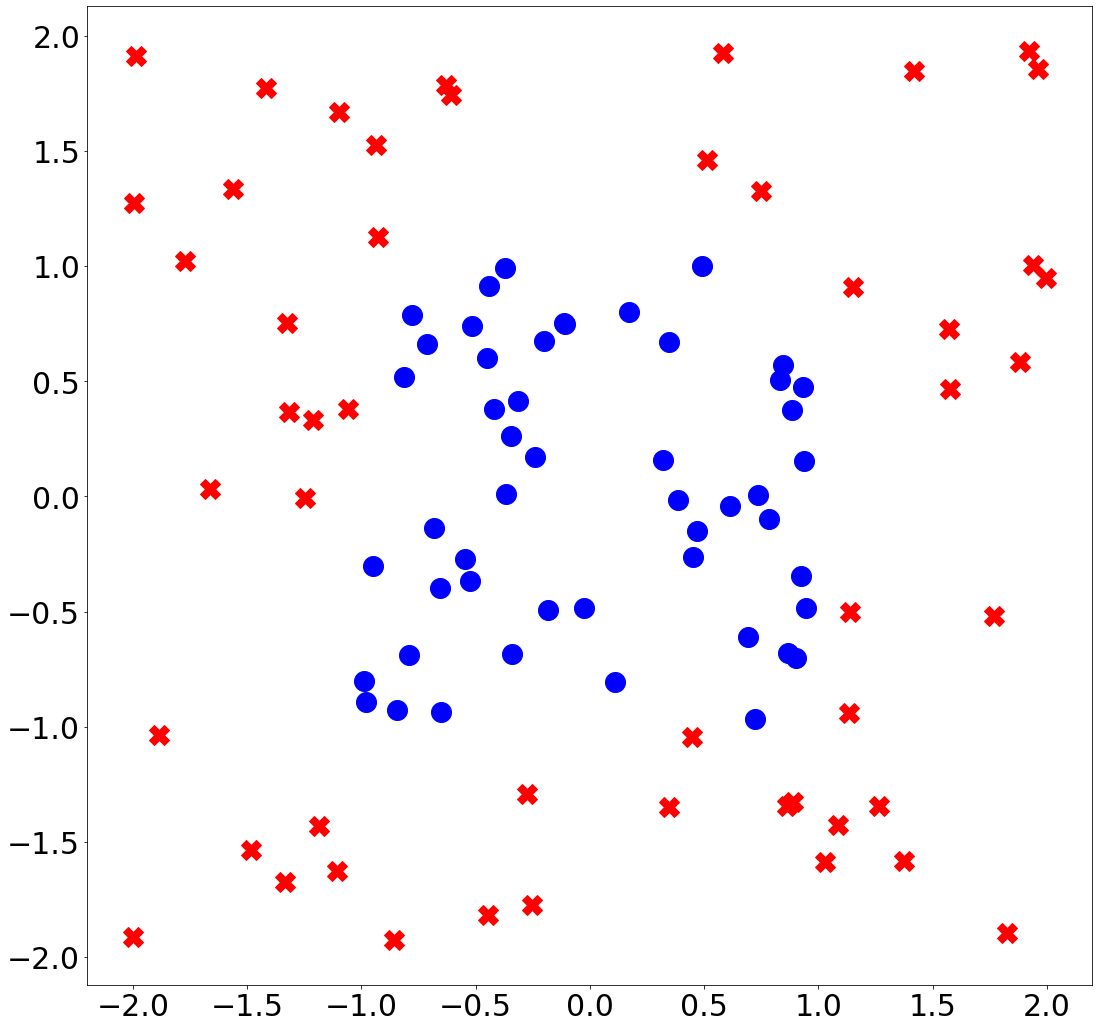

In [2]:
# 這裡我們建立一個100*2的矩陣x
# 100代表我們有100個點，2代表為2維空間(平面)
x=np.zeros((100,2))
# 這裡我們建立一個長度100的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(100)
# 因為有100筆資料，所以跑100個迴圈
for i in range(0,100): 
    # 標記y前半段0~49為圈圈(+1)，後半段50~99為叉叉(-1)
    # 也就是圈圈50個點，叉叉50個點
    f=1
    if(i<50):
        y[i]=1
        x[i,0],x[i,1]=random.uniform(-f,f),random.uniform(-f,f)
    else:
        y[i]=-1
        # 這邊為了讓我們的叉叉分布均勻一點用了一點小技巧
        if(i%4==0):
            x[i,0],x[i,1]=random.uniform(f,2*f),random.uniform(-f,2*f)
        elif(i%4==1):
            x[i,0],x[i,1]=random.uniform(-f,-2*f),random.uniform(-2*f,f)
        elif(i%4==2):
            x[i,0],x[i,1]=random.uniform(-2*f,f),random.uniform(f,2*f)
        else:
            x[i,0],x[i,1]=random.uniform(-f,2*f),random.uniform(-f,-2*f)
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# 特徵轉換(Feature Transform)

In [3]:
feat_x=np.zeros((100,6))
feat_x[:,0]=np.ones(100)
feat_x[:,1]=x[:,0]
feat_x[:,2]=x[:,1]
feat_x[:,3]=x[:,0]**2
feat_x[:,4]=x[:,1]**2
feat_x[:,5]=x[:,0]*x[:,1]

##### 定義我們一些會需要用的方程式
##### (1) Sign function (2) 找錯誤點的方程式 (3) 計算錯誤點個數的方程式 (4) 繪圖方程式

In [4]:
# 這裡我們定義我們的sign function
def sign(w,x):
    # np.dot(w,x)=w0*x0+w1*x1+w2*x2
    # 所以當大於0，我們回傳一，反之則-1
    if(np.dot(w,x)>0):
        return 1
    else:
        return -1
# 這裡我們定義我們尋找分類錯誤點的方程式
def search_error(w,x):
    # 我們用while迴圈跑
    while True:
        # 這裡我們從0~99隨機挑一個數字
        # 也就是我們100個點隨機挑一個
        i=random.randint(0,99)
        # 這裡我們check他有沒有分類錯誤
        if(sign(w,x[i,:])!=y[i]):
            # 找到錯的之後，我們分別把這個點
            # 的位置和是否為圈圈或叉叉記下來
            err_x=x[i,:]
            err_y=y[i]
            # 然後結束我們的while迴圈
            break
        # 沒有分類錯誤，就繼續隨機挑直到找到錯為止
    # 最後回傳我們的錯誤點資訊
    return err_x,err_y
# 這裡我們定義計算錯誤點數的方程式
def compute_error(w,x):
    # 初始化
    err=0
    # 檢查全部的點
    for i in range(0,100):
        # 如果分類錯了，就+1個
        if(sign(w,x[i,:])!=y[i]):
            err+=1
    # 回傳錯誤個數
    return err
# 這裡我們定義畫圖方程式
def plot_diagram(w,x):
    plt.rcParams["figure.figsize"] = (18,18)
    plt.plot(x[:50,1],x[:50,2],"bo",markersize=20)
    plt.plot(x[50:,1],x[50:,2],"rX",markersize=20)
    # 這裡是畫出分割線的算法
    # 我們知道分割線滿足 w0+w1*x1+w2*x2+w3*x1^2+w4*x2^2+w5*x1x2=0
    # 我們知道x1的話等於w4*x2^2+(w2+w5*x1)*x2+(w0+w1*x1+w3*x1^2)=0
    # 我們知道x2的話等於w3*x1^2+(w1+w5*x2)*x1+(w0+w2*x2+w4*x1^2)=0
    # 就是我們熟習的 A*x2^2+B*x2+C=0
    ###### 這邊帶入x1求解 ######
    x1=np.linspace(-2*f,2*f,300)
    for i in range(0,len(x1)):
        A1=w[4]
        B1=w[2]+w[5]*x1[i]
        C1=w[0]+w[1]*x1[i]+w[3]*(x1[i]**2)
        # 用numpy套件roots求解方程式的根
        # 如果裡面含有複數就部畫出來
        is_complex=0
        temp=np.roots([A1,B1,C1])
        for tt in temp:
            if isinstance(tt,complex):
                is_complex+=1
        if (is_complex==0):
            plt.plot(x1[i],temp[0],"ko")
            plt.plot(x1[i],temp[1],"ko")
    ###### 這邊帶入x2求解 ######
    x2=np.linspace(-2*f,2*f,300)
    for i in range(0,len(x2)):
        A2=w[3]
        B2=w[1]+w[5]*x2[i]
        C2=w[0]+w[2]*x2[i]+w[4]*(x2[i]**2)
        is_complex=0
        temp=np.roots([A2,B2,C2])
        for tt in temp:
            if isinstance(tt,complex):
                is_complex+=1
        if (is_complex==0):
            plt.plot(temp[0],x2[i],"ko")
            plt.plot(temp[1],x2[i],"ko")
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    # xlim就是限制我們圖輸出的x座標
    # ylim就是限制我們圖輸出的y座標
    plt.xlim([-2*f,2*f])
    plt.ylim([-2*f,2*f])
    plt.show()

##### 執行我們的演算法

50
48


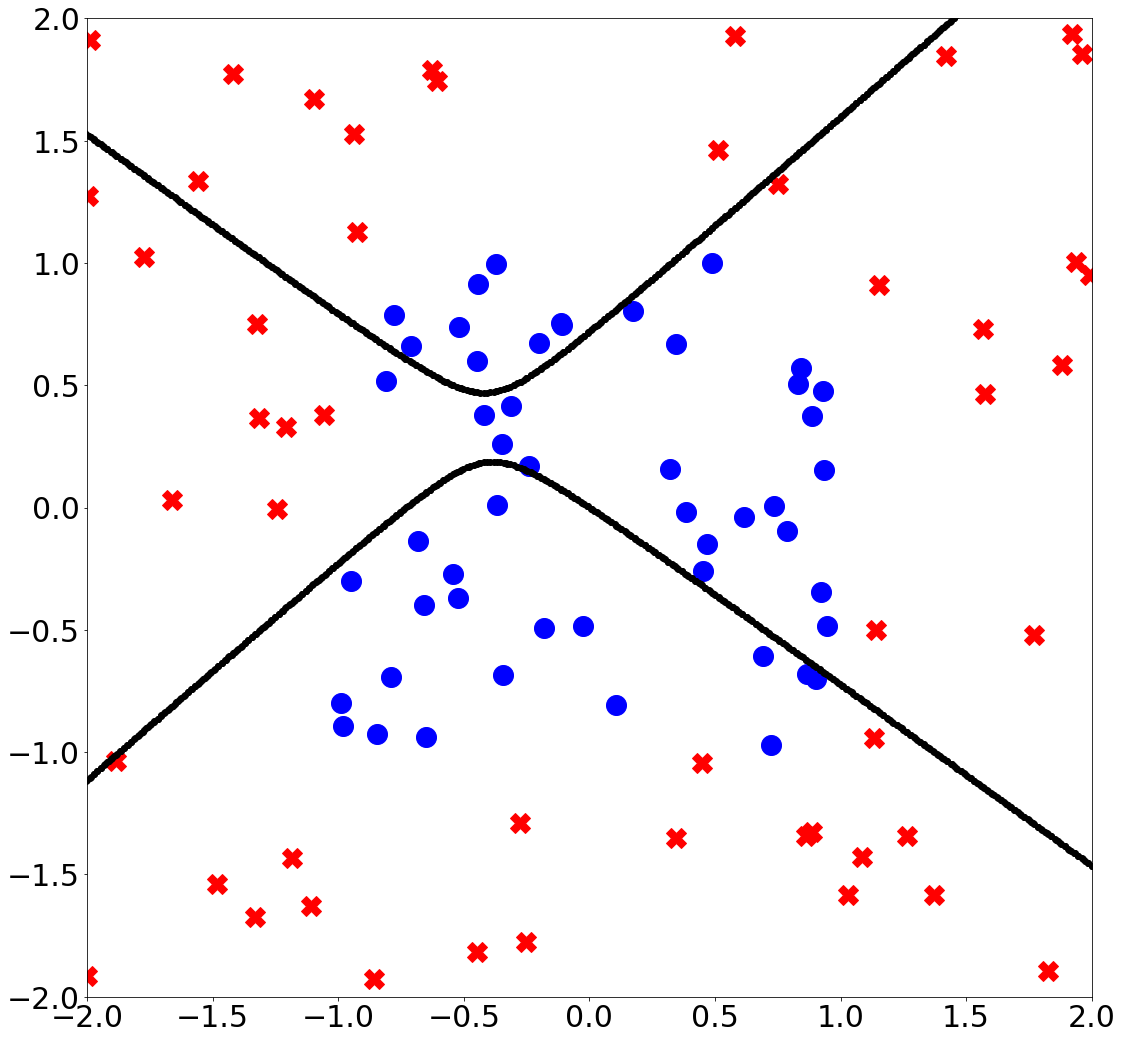

31


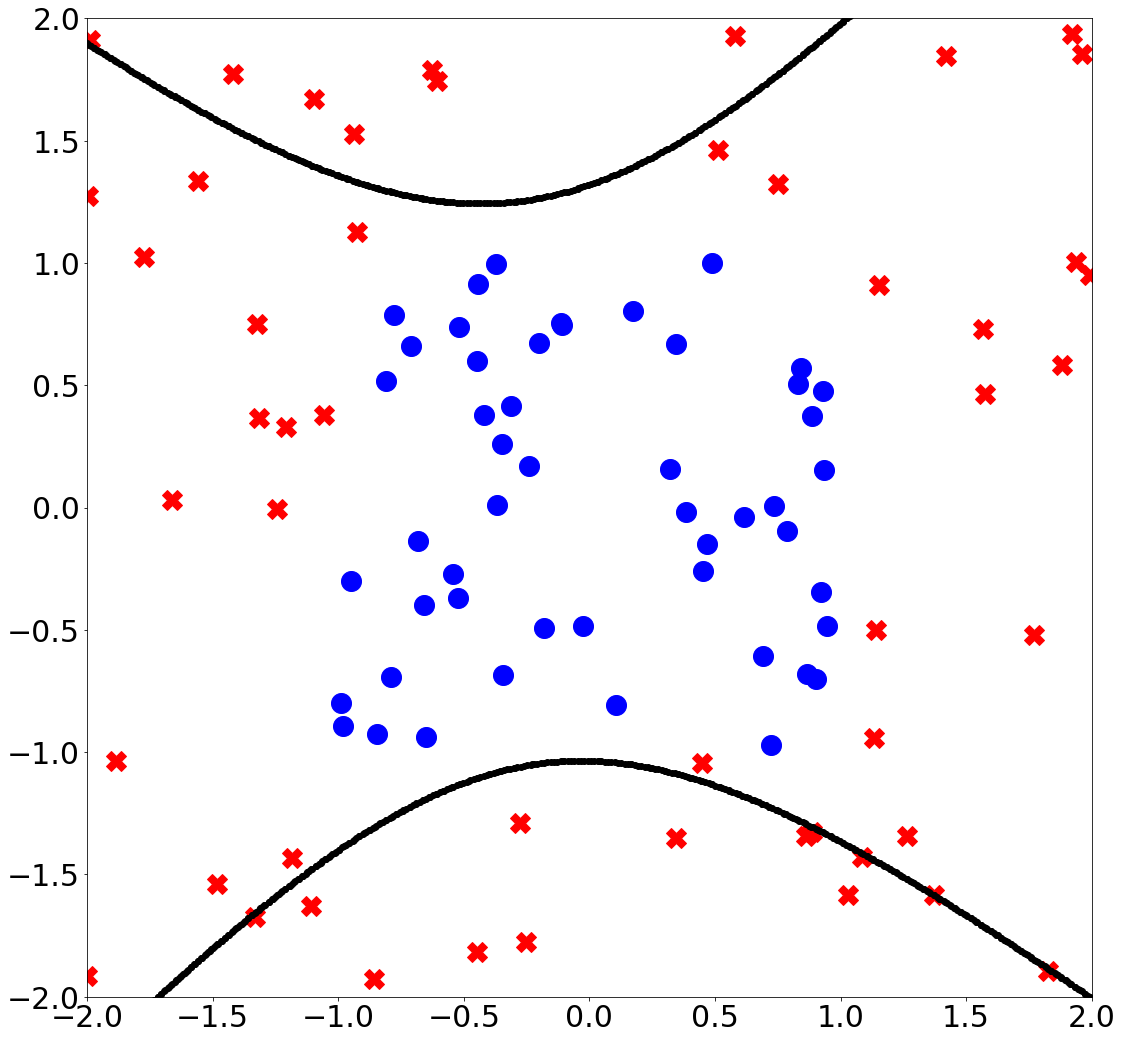

22


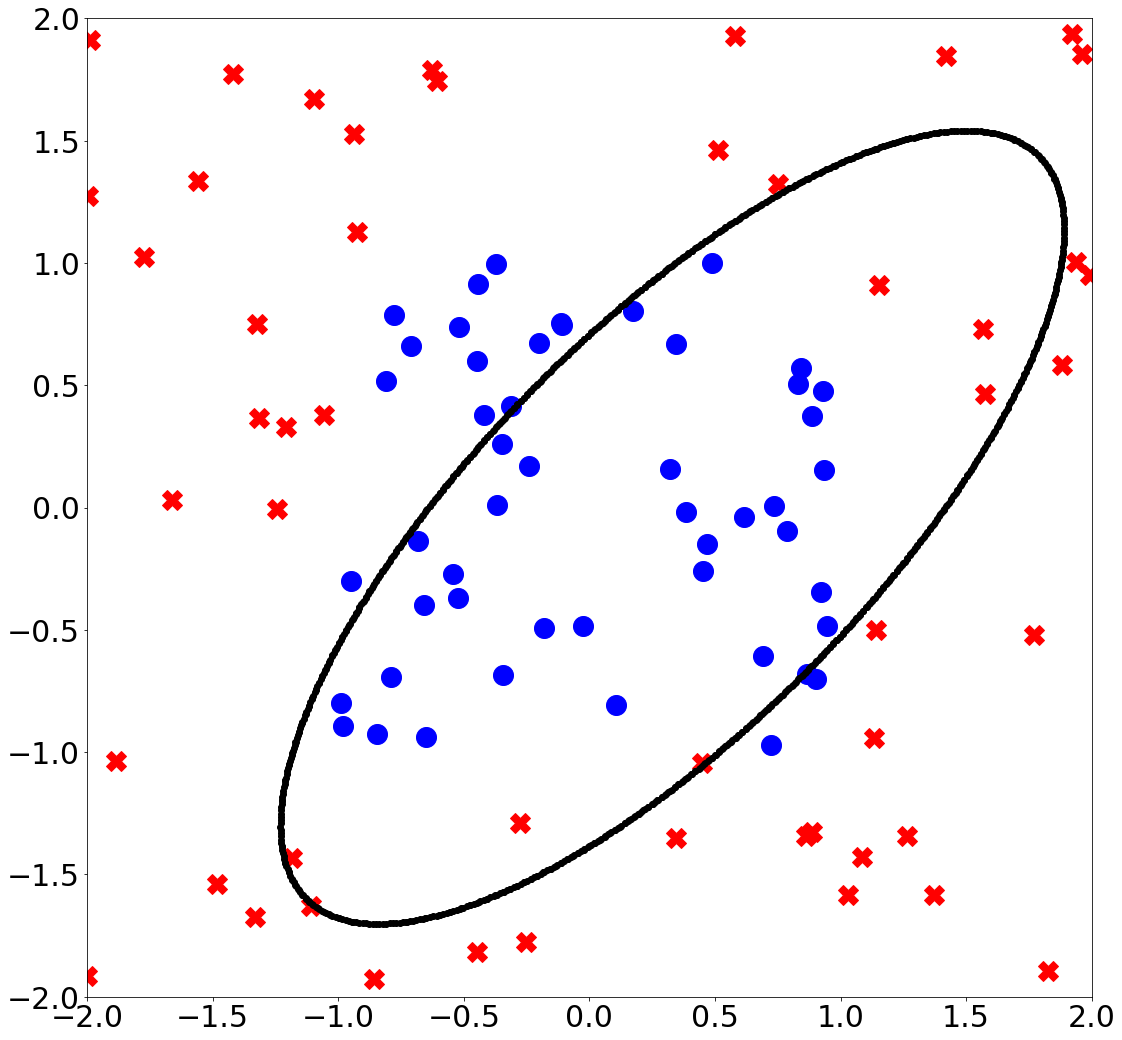

20


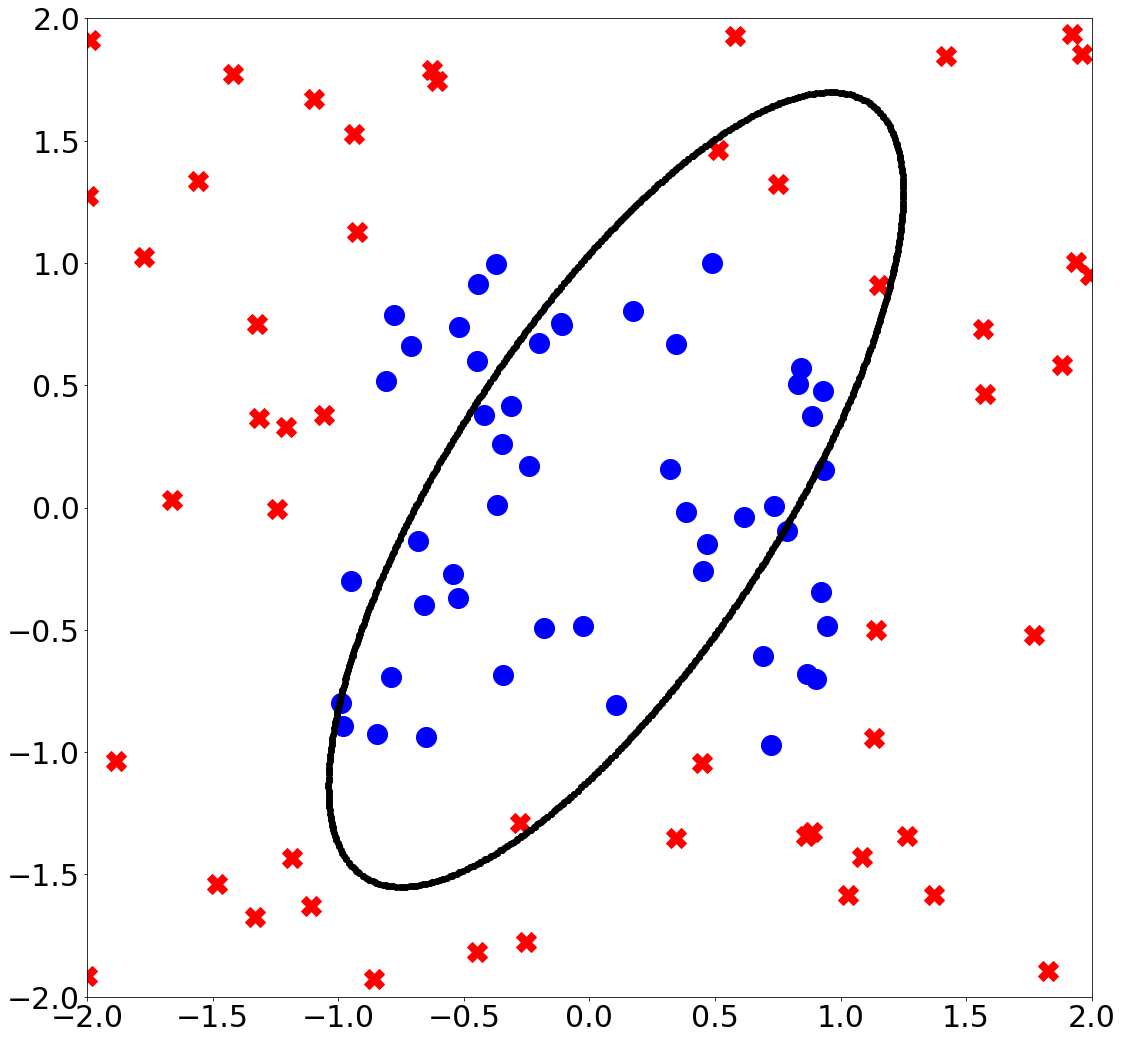

17


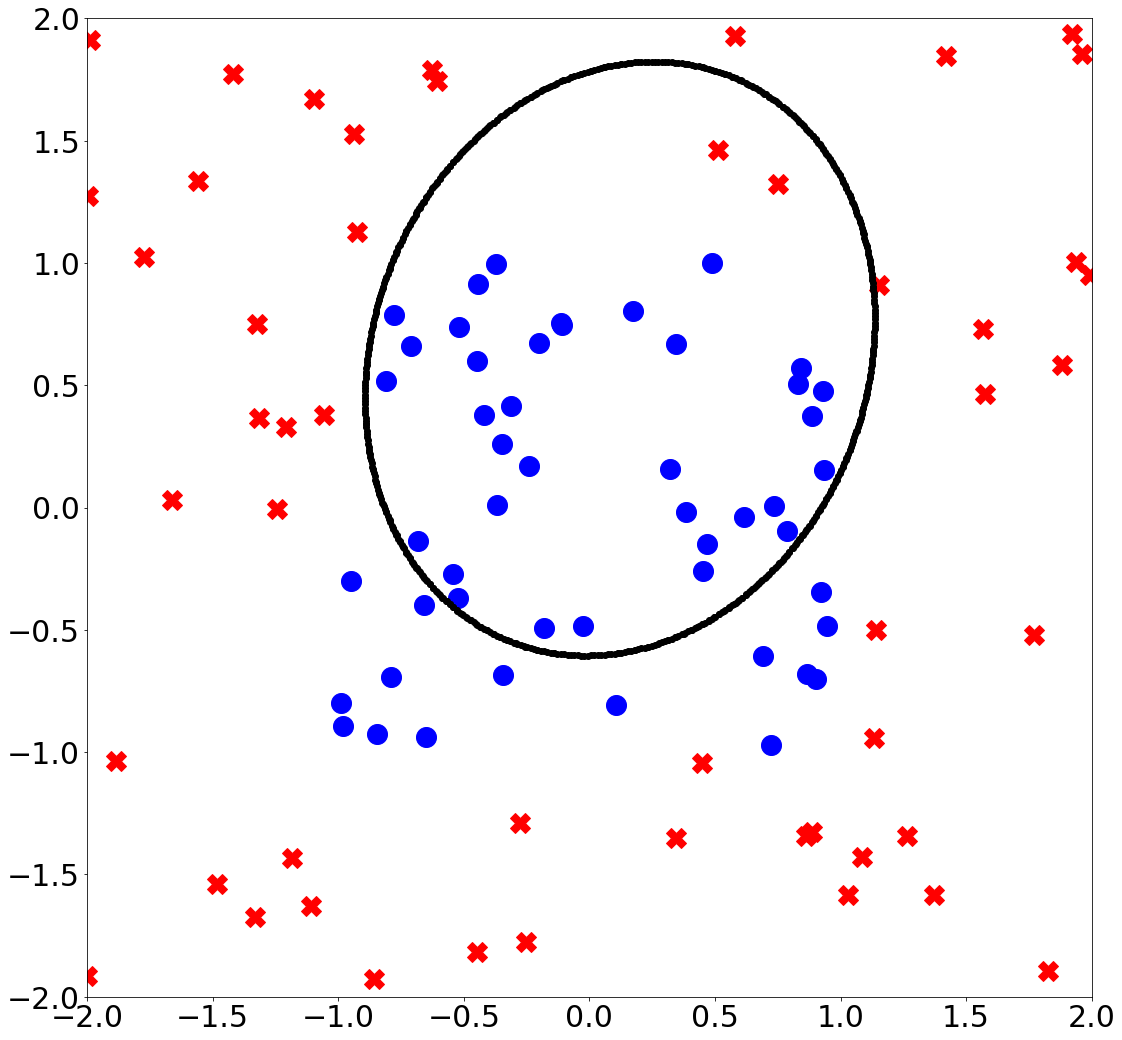

16


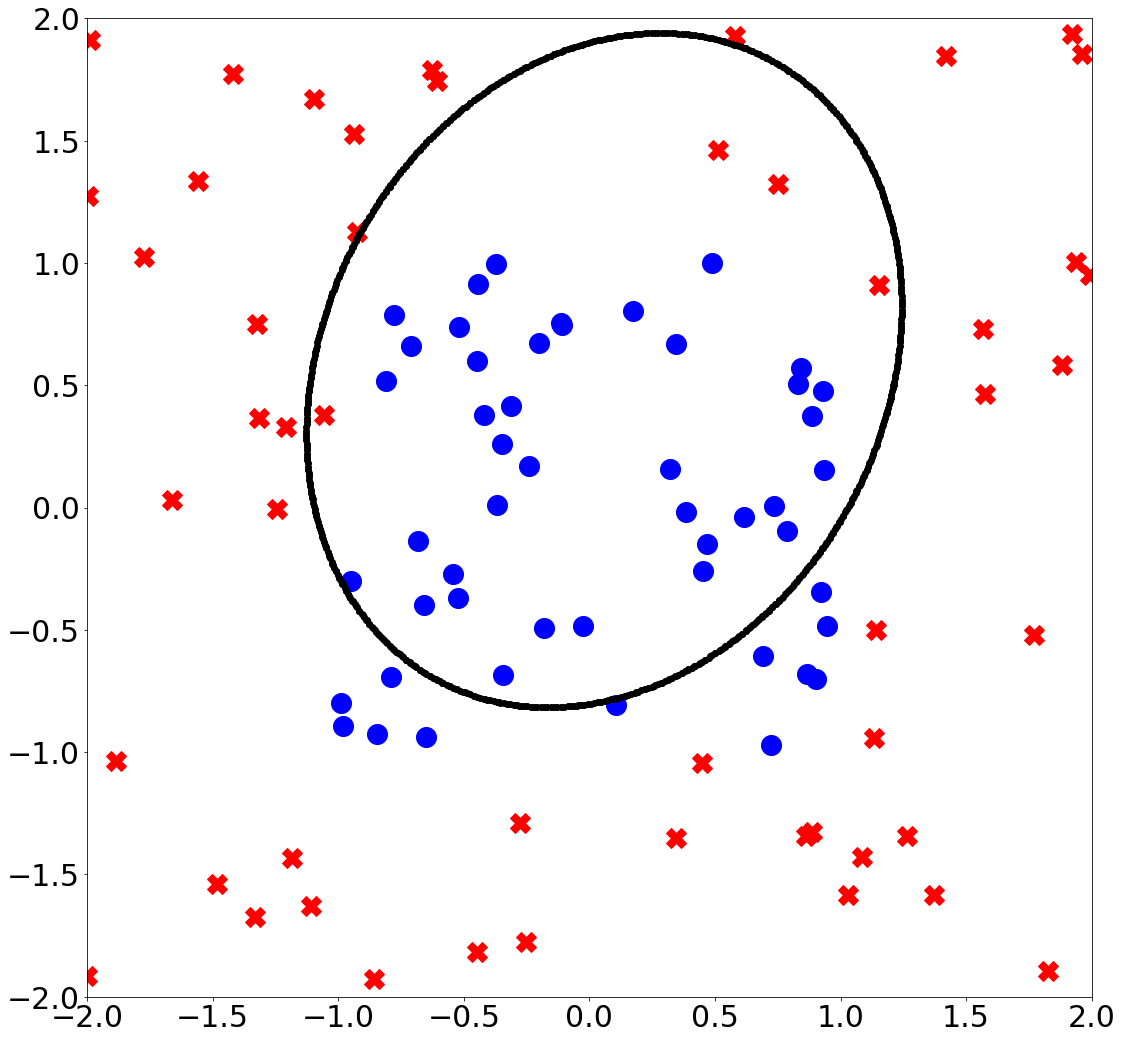

11


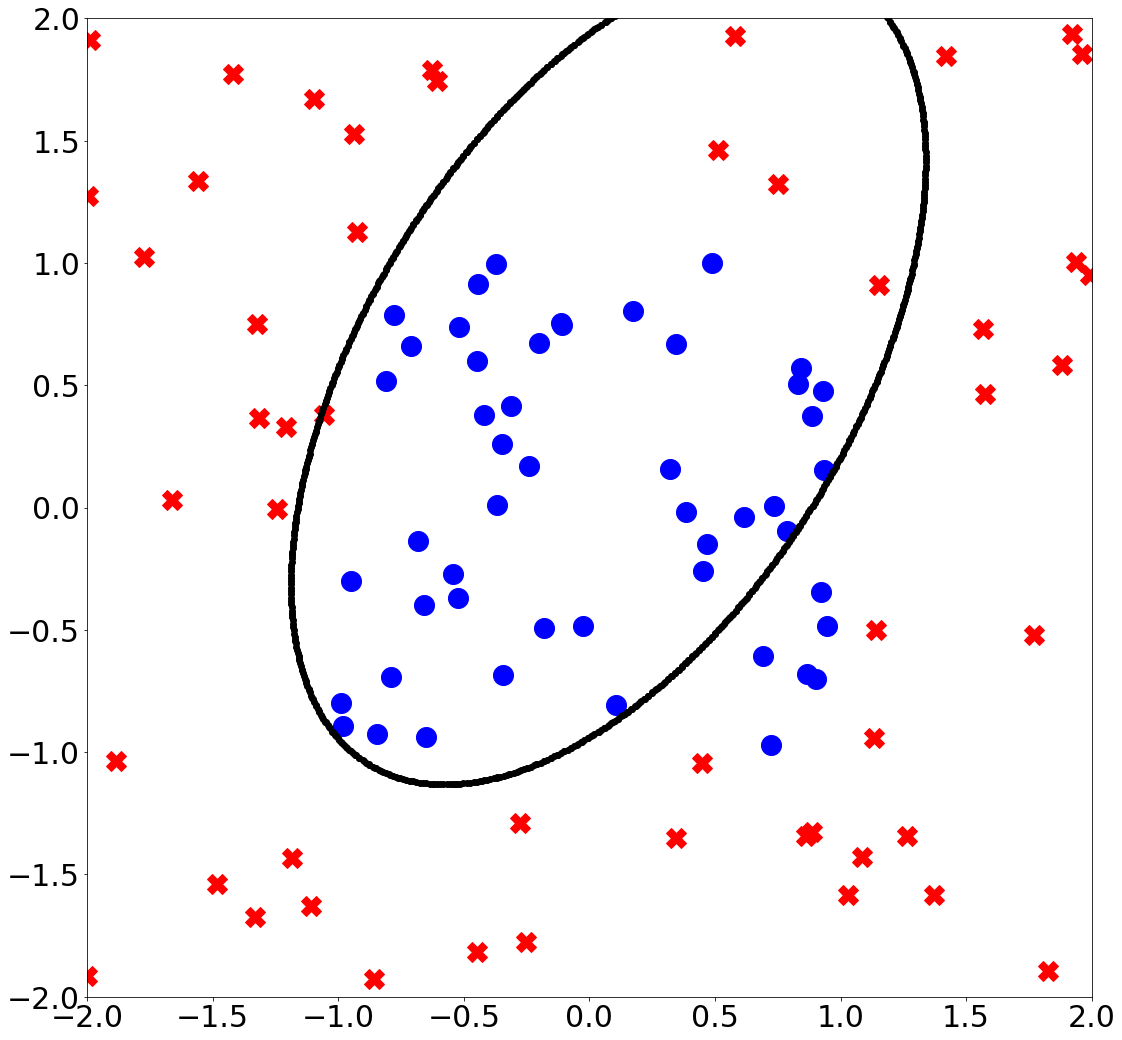

9


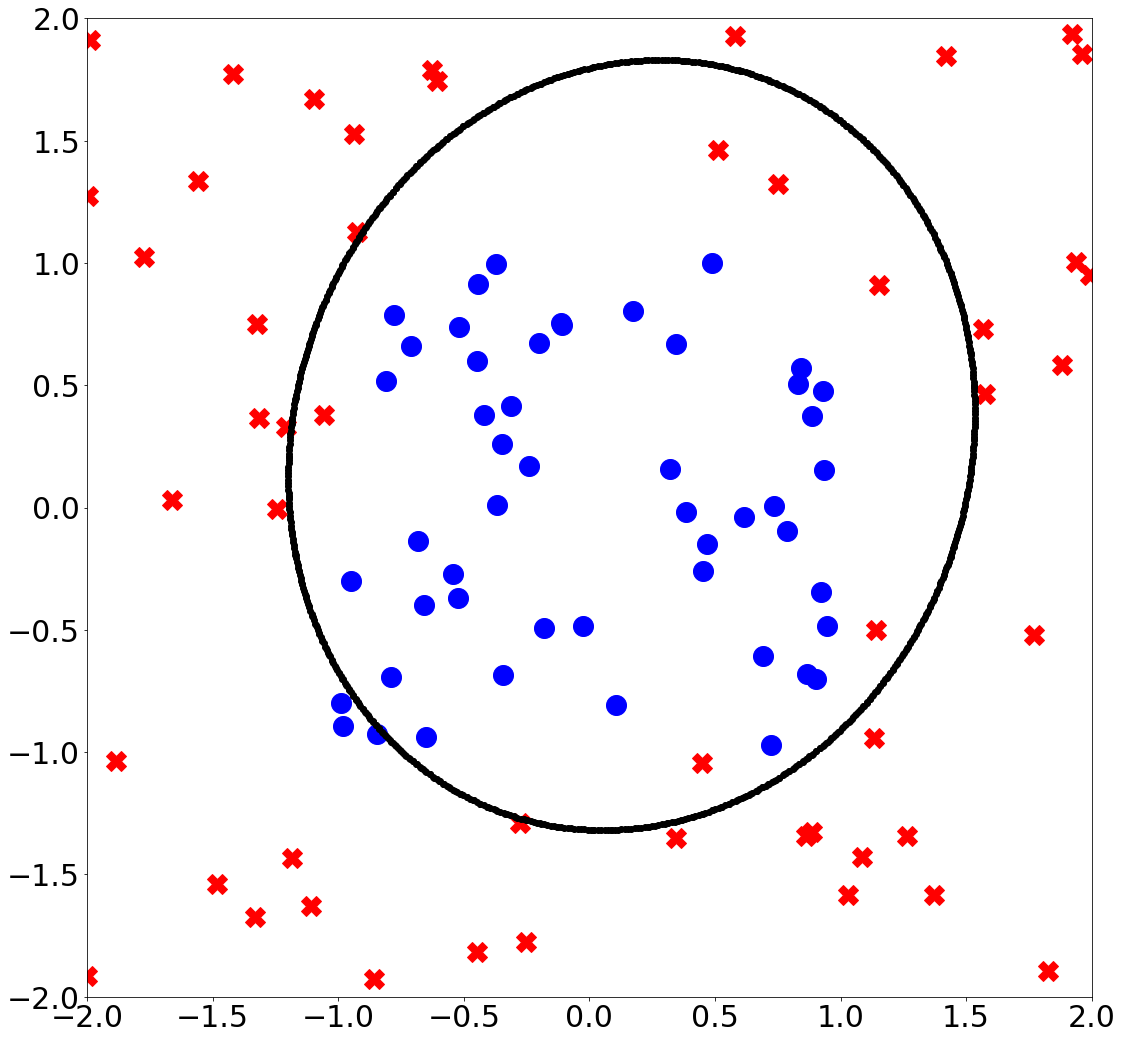

7


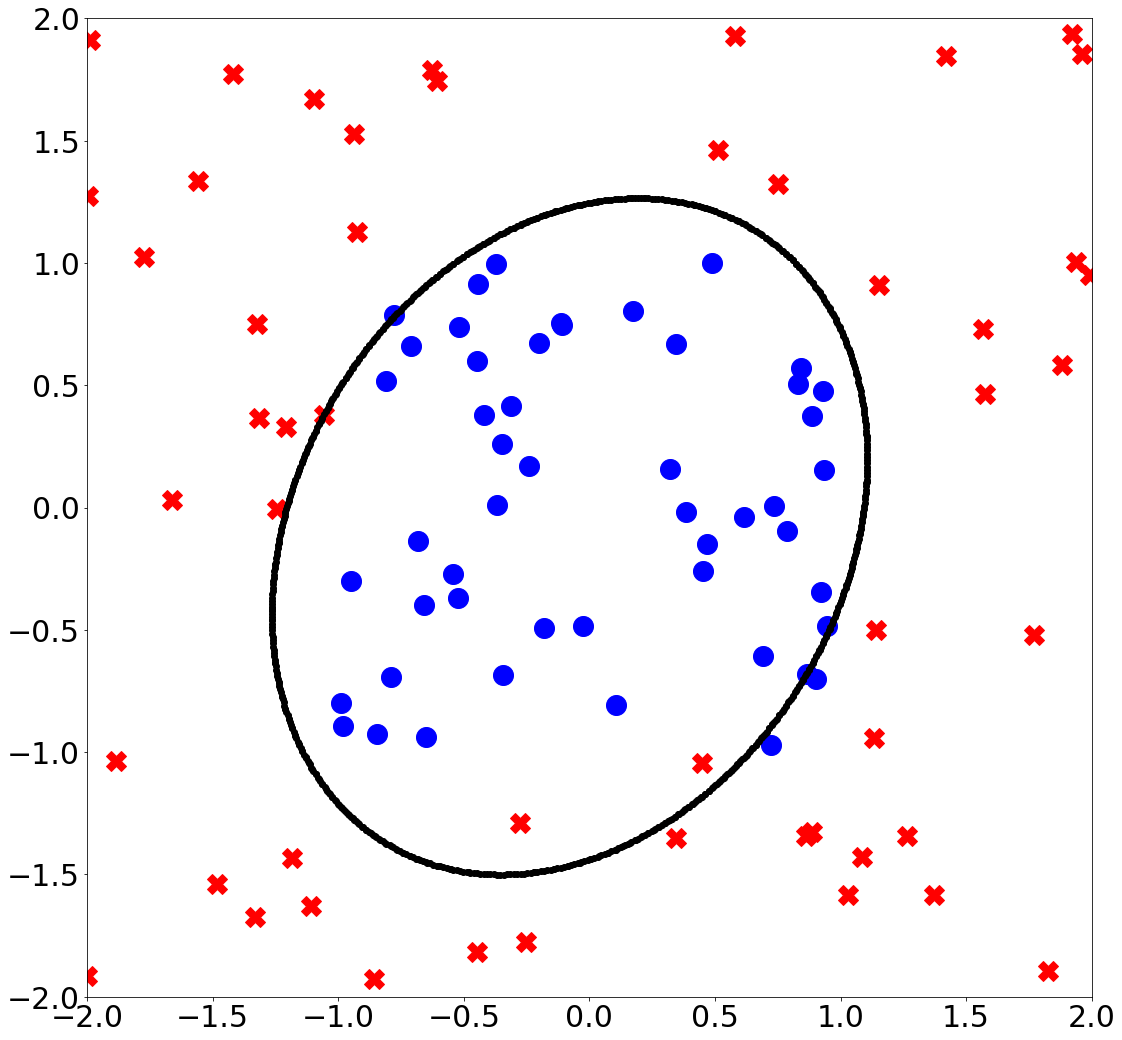

6


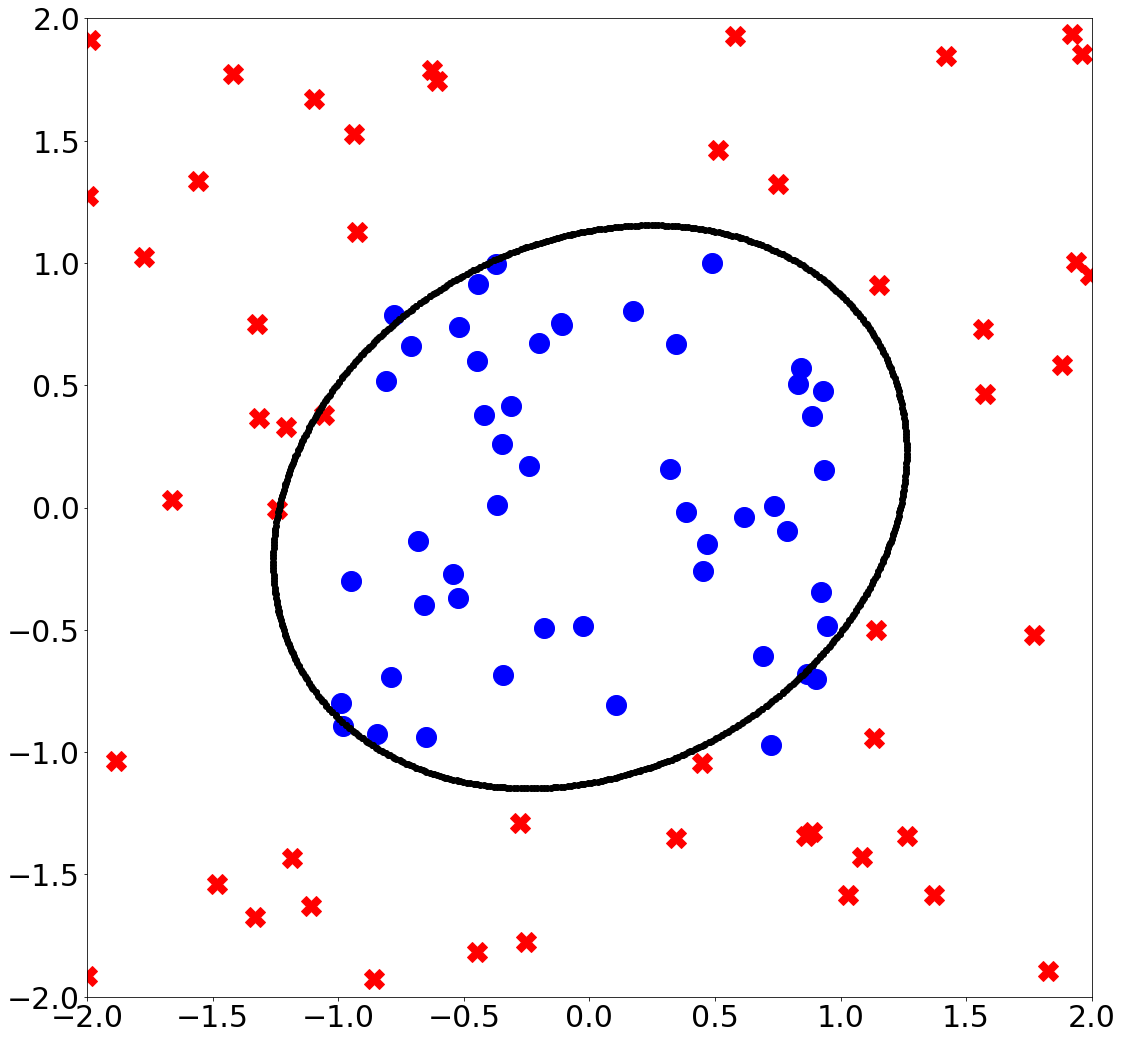

5


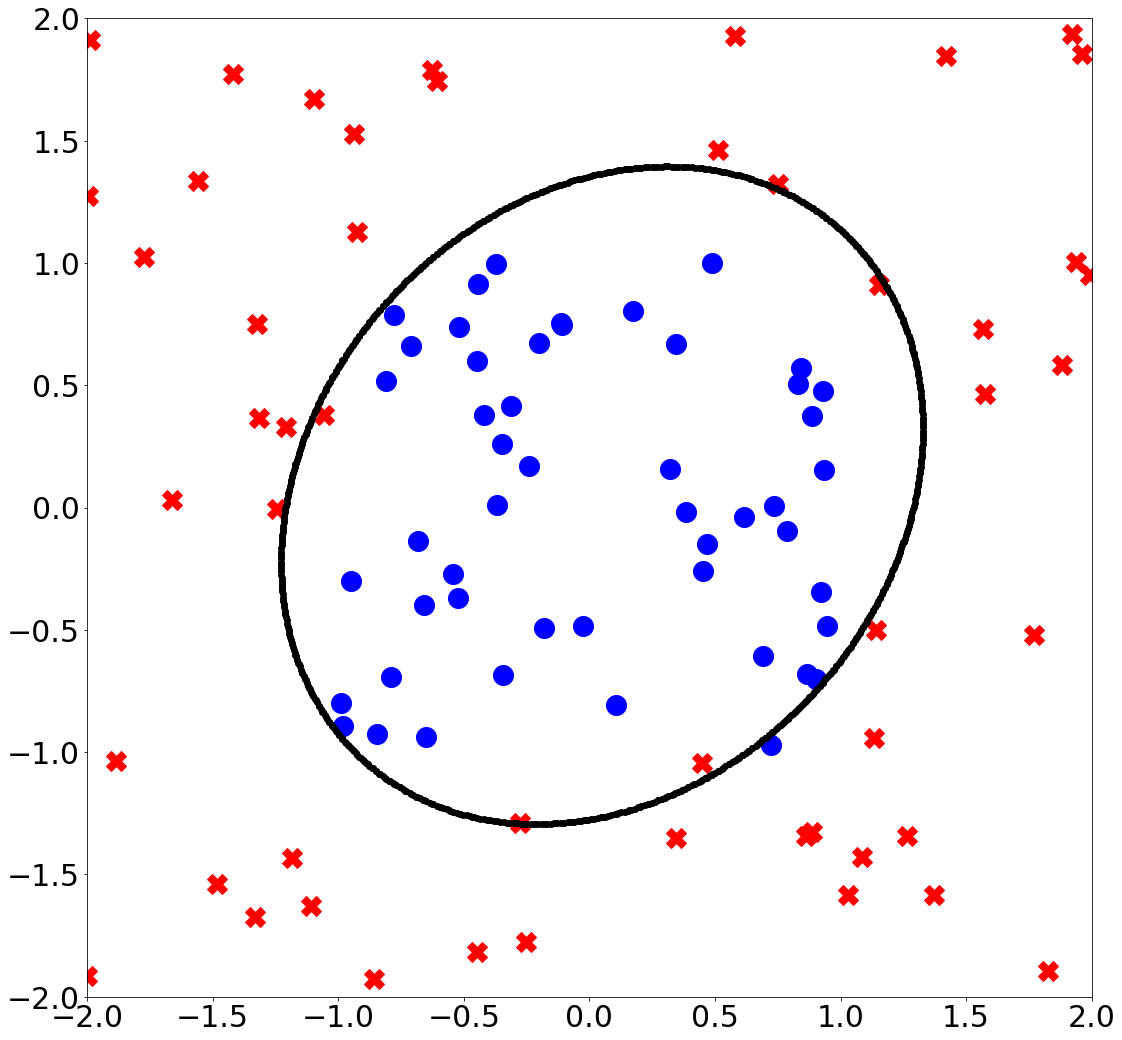

4


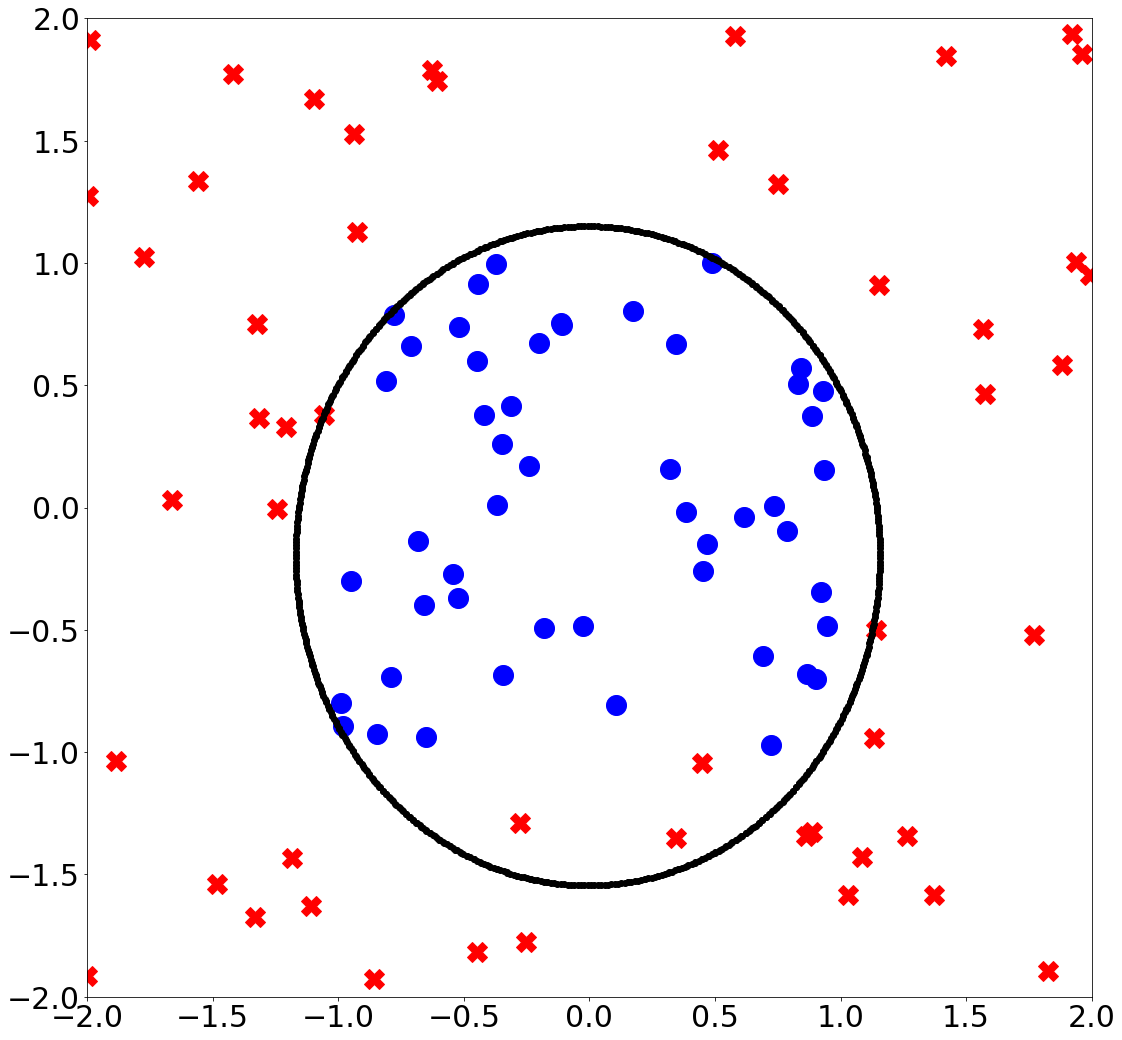

In [5]:
# 初始化權重w
w=np.zeros(6)
# 設定我們演算法要跑幾次
T=100
# 我們先計算初始狀況有積個分類錯誤
# 照理來說電腦一開始會把圈圈和叉叉全部
# 分在同一類，所以會有50個分類錯誤
error=compute_error(w,feat_x)
print(error)
# 開始迴圈
for t in range(0,T):
    # 這裡引入tmp_error用於比較上一次的error數量
    tmp_error=0
    # 隨機挑一個錯誤的點
    error_x,error_y=search_error(w,feat_x)
    # 更新我們的w
    w=w+error_y*error_x
    # 然後計算更新後的w，其錯誤的個數
    tmp_error=compute_error(w,feat_x)
    # 如果更新後錯誤率下降
    # 我們就更新我們的錯誤率
    # 並把它畫出來
    if(tmp_error<error):
        error=tmp_error
        print(error)
        plot_diagram(w,feat_x)
        # 如果沒有錯誤點就停止迴圈
        if(error==0):
            break


##### 這裡我們來比較各種不同次方特徵轉換的效果

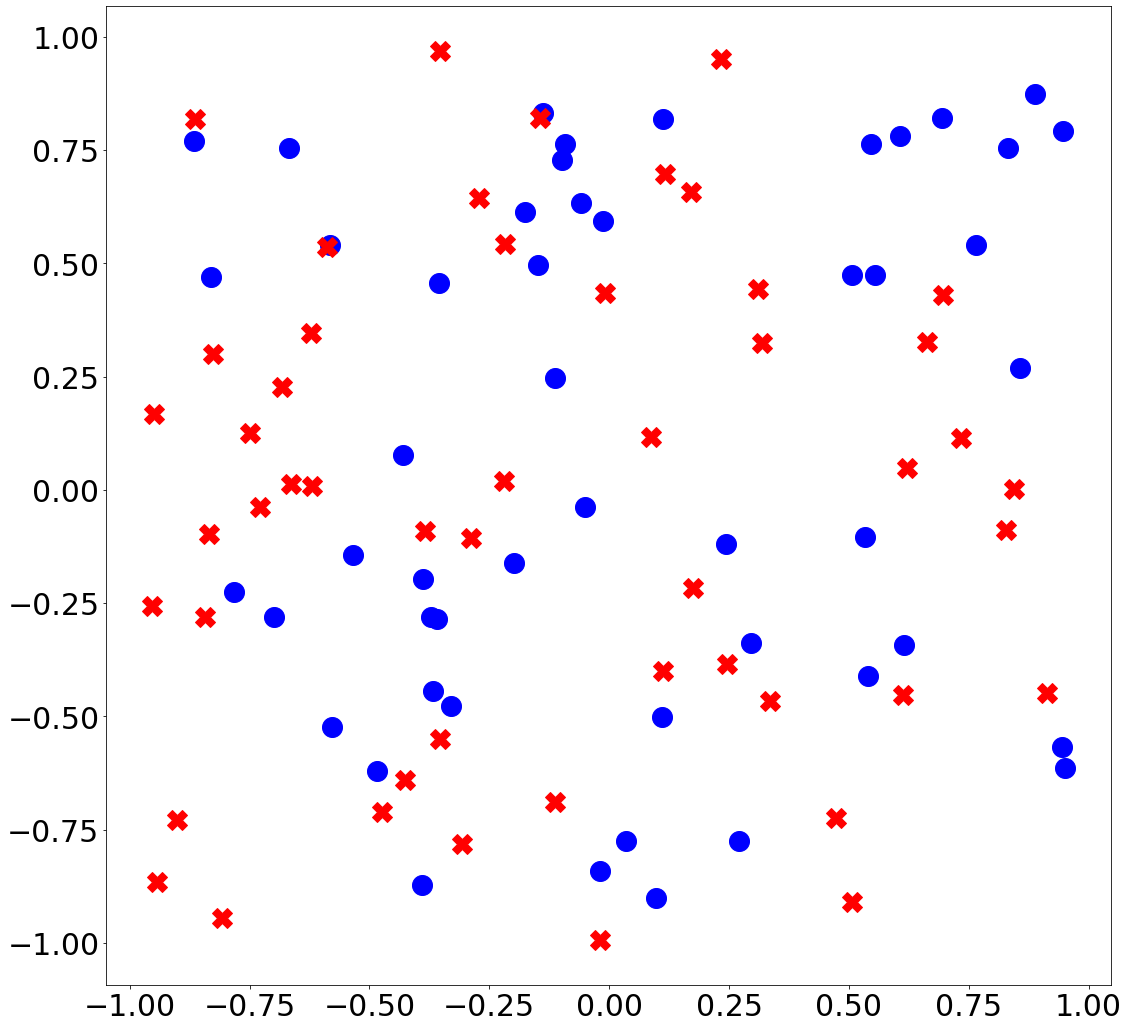

In [40]:
# 這裡我們建立一個100*2的矩陣x
# 100代表我們有100個點，2代表為2維空間(平面)
x=np.zeros((100,2))
# 這裡我們建立一個長度100的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(100)
# 因為有100筆資料，所以跑100個迴圈
for i in range(0,100): 
    # 標記y前半段0~49為圈圈(+1)，後半段50~99為叉叉(-1)
    # 也就是圈圈50個點，叉叉50個點
    # 這次為了比較各個次方感知器的效果
    # 我們就不刻意設計分布，就真的讓他隨機分布了
    f=1
    if(i<50):
        y[i]=1
        x[i,0],x[i,1]=random.uniform(-f,f),random.uniform(-f,f)
    else:
        y[i]=-1
        x[i,0],x[i,1]=random.uniform(-f,f),random.uniform(-f,f)
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# 特徵轉換(Feature Transform)

In [41]:
###### 原始數據點 ######
feat_x_1=np.zeros((100,3))
feat_x_1[:,0]=np.ones(100)
feat_x_1[:,1]=x[:,0]
feat_x_1[:,2]=x[:,1]
###### 二次方轉換 ######
feat_x_2=np.zeros((100,6))
feat_x_2[:,:3]=feat_x_1
feat_x_2[:,3]=x[:,0]**2
feat_x_2[:,4]=x[:,0]*x[:,1]
feat_x_2[:,5]=x[:,1]**2
###### 三次方轉換 ######
feat_x_3=np.zeros((100,10))
feat_x_3[:,:6]=feat_x_2
feat_x_3[:,6]=x[:,0]**3
feat_x_3[:,7]=(x[:,0]**2)*x[:,1]
feat_x_3[:,8]=x[:,0]*(x[:,1]**2)
feat_x_3[:,9]=x[:,1]**3
###### 四次方轉換 ######
feat_x_4=np.zeros((100,15))
feat_x_4[:,:10]=feat_x_3
feat_x_4[:,10]=x[:,0]**4
feat_x_4[:,11]=(x[:,0]**3)*x[:,1]
feat_x_4[:,12]=(x[:,0]**2)*(x[:,1]**2)
feat_x_4[:,13]=x[:,0]*(x[:,1]**3)
feat_x_4[:,14]=x[:,1]**4
###### 五次方轉換 ######
feat_x_5=np.zeros((100,21))
feat_x_5[:,:15]=feat_x_4
feat_x_5[:,15]=x[:,0]**5
feat_x_5[:,16]=(x[:,0]**4)*(x[:,1])
feat_x_5[:,17]=(x[:,0]**3)*(x[:,1]**2)
feat_x_5[:,18]=(x[:,0]**2)*(x[:,1]**3)
feat_x_5[:,19]=(x[:,0])*(x[:,1]**4)
feat_x_5[:,19]=x[:,1]**5
###### 六次方轉換 ######
feat_x_6=np.zeros((100,28))
feat_x_6[:,:21]=feat_x_5
feat_x_6[:,21]=x[:,0]**6
feat_x_6[:,22]=(x[:,0]**5)*(x[:,1])
feat_x_6[:,23]=(x[:,0]**4)*(x[:,1]**2)
feat_x_6[:,24]=(x[:,0]**3)*(x[:,1]**3)
feat_x_6[:,25]=(x[:,0]**2)*(x[:,1]**4)
feat_x_6[:,26]=x[:,0]*(x[:,1]**5)
feat_x_6[:,27]=x[:,1]**6

# 無特徵轉換

50
49
44
42
40
39


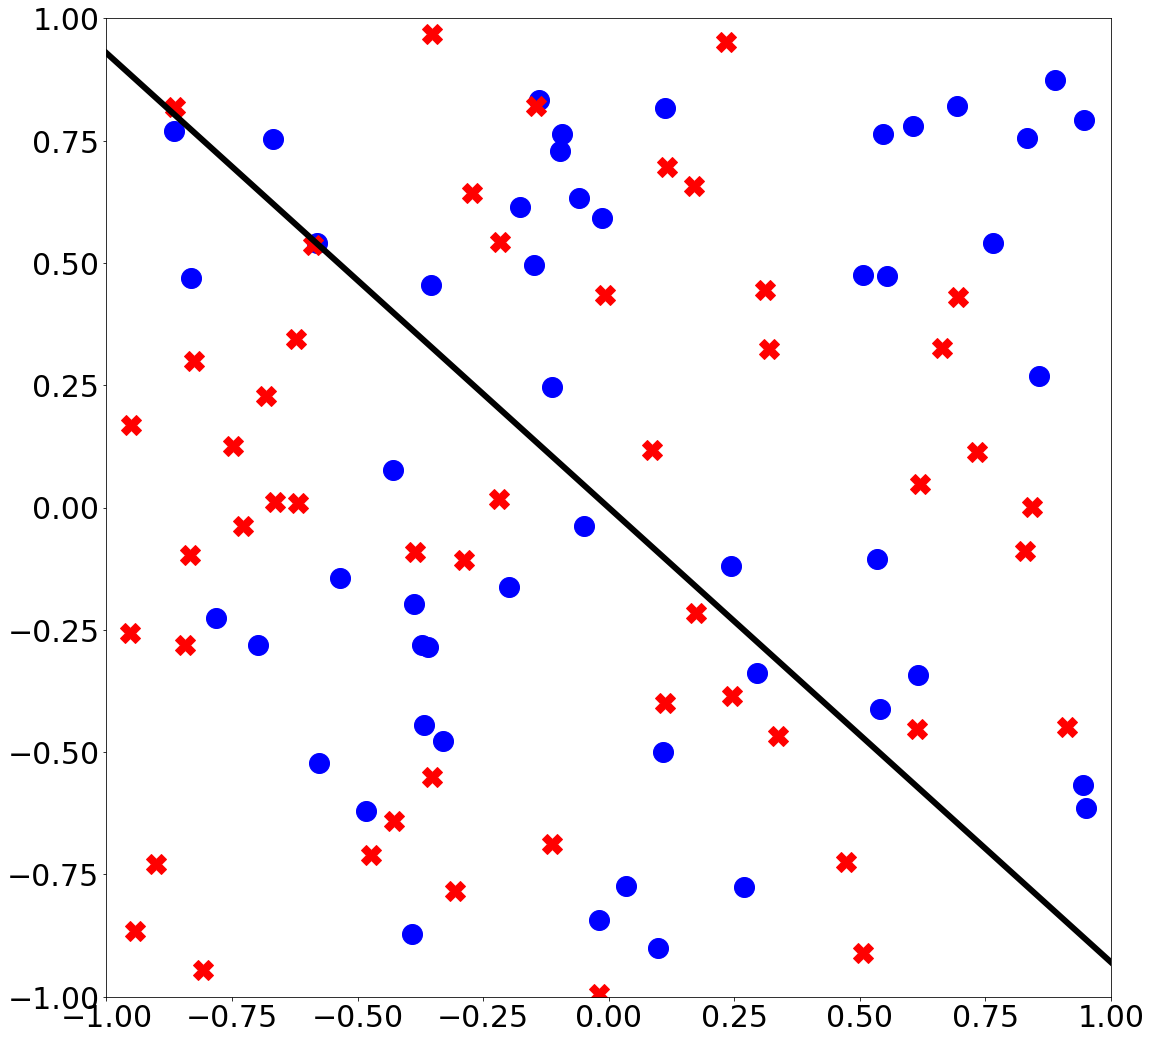

In [42]:
w_1=np.zeros(3)
T=3000
error=compute_error(w_1,feat_x_1)
print(error)
for t in range(0,T):
    tmp_error=0
    error_x,error_y=search_error(w_1,feat_x_1)
    w_1=w_1+error_y*error_x
    tmp_error=compute_error(w_1,feat_x_1)
    if(tmp_error<error):
        error=tmp_error
        print(error)
        if(error==0):
            break
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(feat_x_1[:50,1],feat_x_1[:50,2],"bo",markersize=20)
plt.plot(feat_x_1[50:,1],feat_x_1[50:,2],"rX",markersize=20)
m=-w_1[1]/w_1[2]
b=-w_1[0]/w_1[2]
plt.plot([-f,f],[m*-f+b,m*f+b],"k-",linewidth=6)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.show()

# 二維特徵轉換

50
45
42
41
40
39
37
36


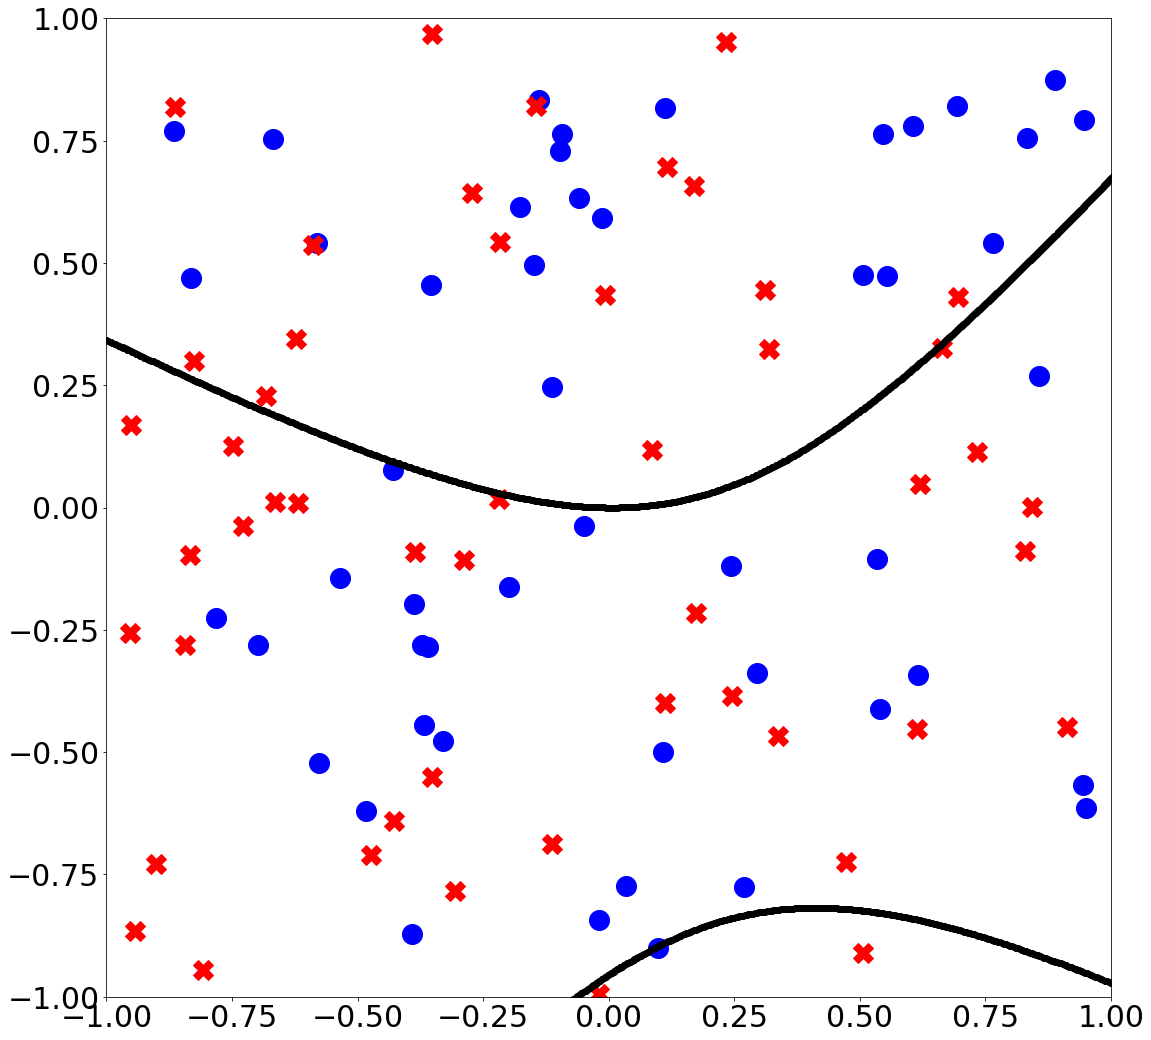

In [43]:
w_2=np.zeros(6)
T=10000
error=compute_error(w_2,feat_x_2)
print(error)
for t in range(0,T):
    tmp_error=0
    error_x,error_y=search_error(w_2,feat_x_2)
    w_2=w_2+error_y*error_x
    tmp_error=compute_error(w_2,feat_x_2)
    if(tmp_error<error):
        error=tmp_error
        print(error)
        if(error==0):
            break
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(feat_x_2[:50,1],feat_x_2[:50,2],"bo",markersize=20)
plt.plot(feat_x_2[50:,1],feat_x_2[50:,2],"rX",markersize=20)
# 我們知道分割線滿足 w0+w1*x1+w2*x2+w3*x1^2+w4*x1x2+w5*x2^2=0
# 我們知道x1的話等於w5*x2^2+(w2+w4*x1)*x2+(w0+w1*x1+w3*x1^2)=0
# 我們知道x2的話等於w3*x1^2+(w1+w4*x2)*x1+(w0+w2*x2+w5*x2^2)=0
# 就是 A*x^2+B*x+C=0
###### 這邊帶入x1求解 ######
x1=np.linspace(-f,f,500)
for i in range(0,len(x1)):
    A1=w_2[5]
    B1=w_2[2]+w_2[4]*x1[i]
    C1=w_2[0]+w_2[1]*x1[i]+w_2[3]*(x1[i]**2)
    is_complex=0
    temp=np.roots([A1,B1,C1])
    for tt in temp:
        if isinstance(tt,complex):
            is_complex+=1
    if (is_complex==0):
        plt.plot(x1[i],temp[0],"ko")
        plt.plot(x1[i],temp[1],"ko")
###### 這邊帶入x2求解 ######
x2=np.linspace(-f,f,500)
for i in range(0,len(x2)):
    A2=w_2[3]
    B2=w_2[1]+w_2[4]*x2[i]
    C2=w_2[0]+w_2[2]*x2[i]+w_2[5]*(x2[i]**2)
    is_complex=0
    temp=np.roots([A2,B2,C2])
    for tt in temp:
        if isinstance(tt,complex):
            is_complex+=1
    if (is_complex==0):
        plt.plot(temp[0],x2[i],"ko")
        plt.plot(temp[1],x2[i],"ko")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.show()

# 三維特徵轉換

50
47
44
42
40
39
37
34
33
32
31


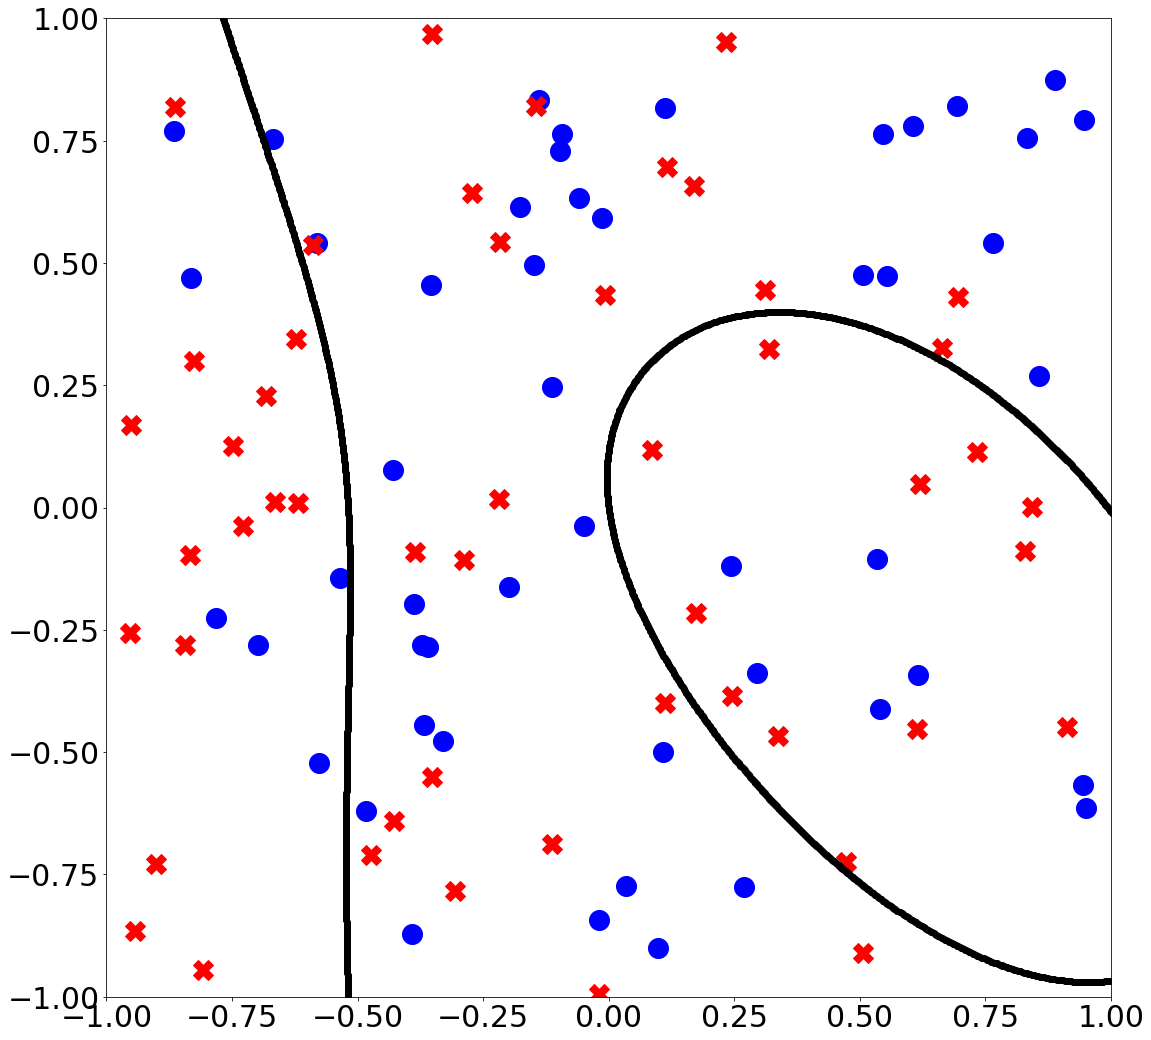

In [44]:
w_3=np.zeros(10)
T=10000
error=compute_error(w_3,feat_x_3)
print(error)
for t in range(0,T):
    tmp_error=0
    error_x,error_y=search_error(w_3,feat_x_3)
    w_3=w_3+error_y*error_x
    tmp_error=compute_error(w_3,feat_x_3)
    if(tmp_error<error):
        error=tmp_error
        print(error)
        if(error==0):
            break
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(feat_x_3[:50,1],feat_x_3[:50,2],"bo",markersize=20)
plt.plot(feat_x_3[50:,1],feat_x_3[50:,2],"rX",markersize=20)
# 我們知道分割線滿足 w0+w1*x1+w2*x2+w3*x1^2+w4*x1x2+w5*x2^2+w6*x1^3+w7*x1^2x2+w8*x1x2^2+w9*x2^3=0
# 我們知道x1的話等於w9*x2^3+(w5+w8*x1)*x2^2+(w2+w4*x1+w7*x1^2)*x2+(w0+w1*x1+w3*x1^2+w6*x1^3)=0
# 我們知道x2的話等於w6*x1^3+(w3+w7*x2)*x1^2+(w1+w4*x2+w8*x1^2)*x1+(w0+w2*x2+w5*x2^2+w9*x2^3)=0
# 就是 A*x^3+B*x^2+C*x+D=0
###### 這邊帶入x1求解 ######
x1=np.linspace(-f,f,500)
for i in range(0,len(x1)):
    A1=w_3[9]
    B1=w_3[5]+w_3[8]*x1[i]
    C1=w_3[2]+w_3[4]*x1[i]+w_3[7]*(x1[i]**2)
    D1=w_3[0]+w_3[1]*x1[i]+w_3[3]*(x1[i]**2)+w_3[6]*(x1[i]**3)
    temp=np.roots([A1,B1,C1,D1])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(x1[i],tt.real,"ko")
        else:
            plt.plot(x1[i],tt,"ko")
###### 這邊帶入x2求解 ######
x2=np.linspace(-f,f,500)
for i in range(0,len(x2)):
    A2=w_3[6]
    B2=w_3[3]+w_3[7]*x2[i]
    C2=w_3[1]+w_3[4]*x2[i]+w_3[8]*(x2[i]**2)
    D2=w_3[0]+w_3[2]*x2[i]+w_3[5]*(x2[i]**2)+w_3[9]*(x2[i]**3)
    temp=np.roots([A2,B2,C2,D2])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(tt.real,x2[i],"ko")
        else:
            plt.plot(tt,x2[i],"ko")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.show()

# 四維特徵轉換

50
49
45
40
39
38
37
35
34
33
30
29
27


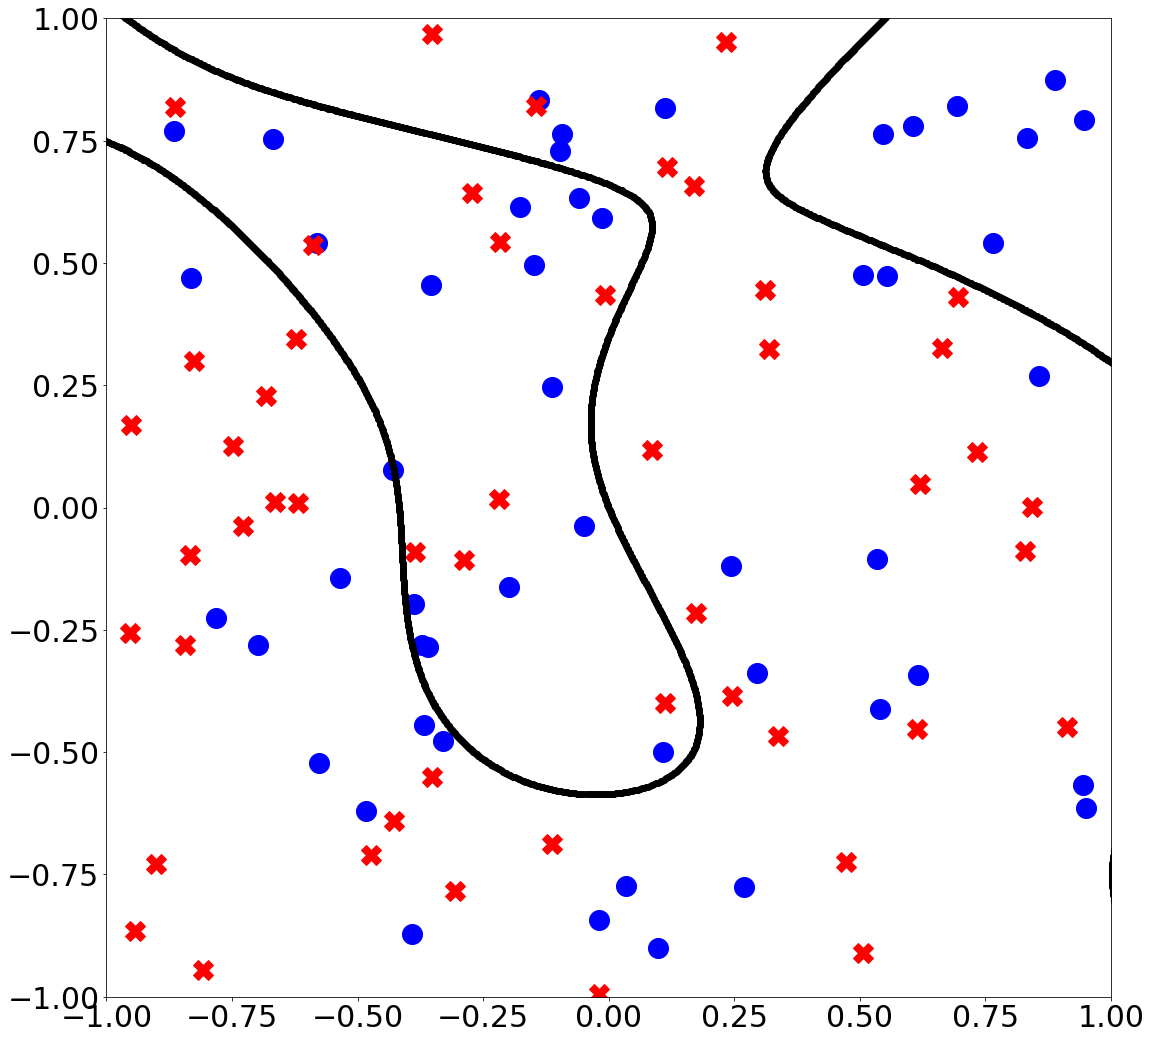

In [45]:
w_4=np.zeros(15)
T=15000
error=compute_error(w_4,feat_x_4)
print(error)
for t in range(0,T):
    tmp_error=0
    error_x,error_y=search_error(w_4,feat_x_4)
    w_4=w_4+error_y*error_x
    tmp_error=compute_error(w_4,feat_x_4)
    if(tmp_error<error):
        error=tmp_error
        print(error)
        if(error==0):
            break
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(feat_x_4[:50,1],feat_x_4[:50,2],"bo",markersize=20)
plt.plot(feat_x_4[50:,1],feat_x_4[50:,2],"rX",markersize=20)
# 我們知道分割線滿足 w0+w1*x1+w2*x2+w3*x1^2+w4*x1x2+w5*x2^2+w6*x1^3+w7*x1^2x2+w8*x1x2^2+w9*x2^3=0
# 我們知道x1的話等於w9*x2^3+(w5+w8*x1)*x2^2+(w2+w4*x1+w7*x1^2)*x2+(w0+w1*x1+w3*x1^2+w6*x1^3)=0
# 我們知道x2的話等於w6*x1^3+(w3+w7*x2)*x1^2+(w1+w4*x2+w8*x1^2)*x1+(w0+w2*x2+w5*x2^2+w9*x2^3)=0
# 就是 A*x^3+B*x^2+C*x+D=0
###### 這邊帶入x1求解 ######
x1=np.linspace(-f,f,500)
for i in range(0,len(x1)):
    A1=w_4[14]
    B1=w_4[9]+w_4[13]*x1[i]
    C1=w_4[5]+w_4[8]*x1[i]+w_4[12]*(x1[i]**2)
    D1=w_4[2]+w_4[4]*x1[i]+w_4[7]*(x1[i]**2)+w_4[11]*(x1[i]**3)
    E1=w_4[0]+w_4[1]*x1[i]+w_4[3]*(x1[i]**2)+w_4[6]*(x1[i]**3)+w_4[10]*(x1[i]**4)
    temp=np.roots([A1,B1,C1,D1,E1])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(x1[i],tt.real,"ko")
        else:
            plt.plot(x1[i],tt,"ko")
###### 這邊帶入x2求解 ######
x2=np.linspace(-f,f,500)
for i in range(0,len(x2)):
    A2=w_4[10]
    B2=w_4[6]+w_4[11]*x2[i]
    C2=w_4[3]+w_4[7]*x2[i]+w_4[12]*(x2[i]**2)
    D2=w_4[1]+w_4[4]*x2[i]+w_4[8]*(x2[i]**2)+w_4[13]*(x2[i]**3)
    E2=w_4[0]+w_4[2]*x2[i]+w_4[5]*(x2[i]**2)+w_4[9]*(x2[i]**3)+w_4[14]*(x2[i]**4)
    temp=np.roots([A2,B2,C2,D2,E2])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(tt.real,x2[i],"ko")
        else:
             plt.plot(tt,x2[i],"ko")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.show()

# 五維特徵轉換

50
45
43
41
40
36
35
34
32
31
30
29
27
26


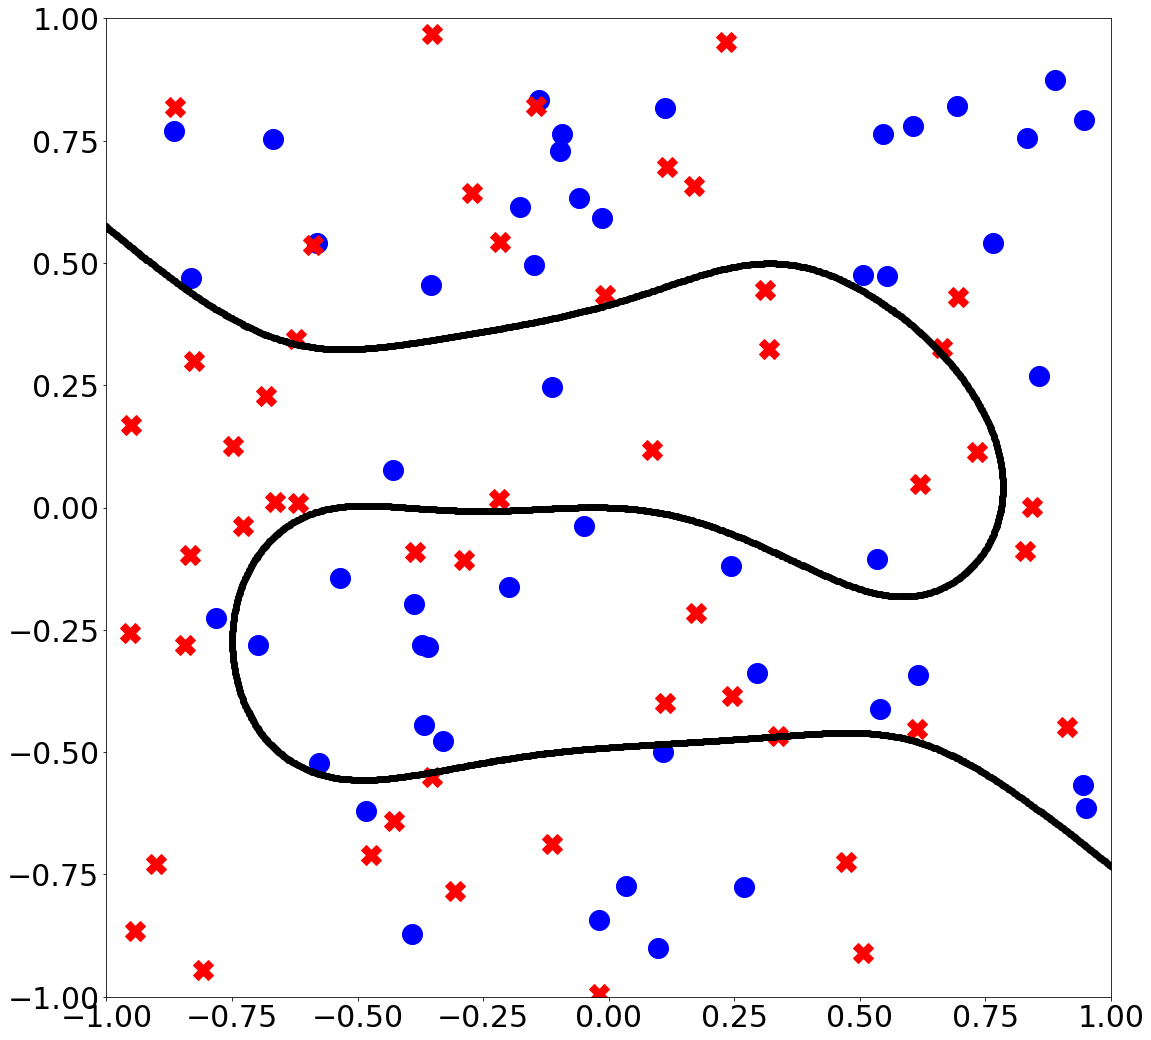

In [47]:
w_5=np.zeros(21)
T=20000
error=compute_error(w_5,feat_x_5)
print(error)
for t in range(0,T):
    tmp_error=0
    error_x,error_y=search_error(w_5,feat_x_5)
    w_5=w_5+error_y*error_x
    tmp_error=compute_error(w_5,feat_x_5)
    if(tmp_error<error):
        error=tmp_error
        print(error)
        if(error==0):
            break
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(feat_x_5[:50,1],feat_x_5[:50,2],"bo",markersize=20)
plt.plot(feat_x_5[50:,1],feat_x_5[50:,2],"rX",markersize=20)
###### 這邊帶入x1求解 ######
x1=np.linspace(-f,f,500)
for i in range(0,len(x1)):
    A1=w_5[20]
    B1=w_5[14]+w_5[19]*x1[i]
    C1=w_5[9]+w_5[13]*x1[i]+w_5[18]*(x1[i]**2)
    D1=w_5[5]+w_5[8]*x1[i]+w_5[12]*(x1[i]**2)+w_5[17]*(x1[i]**3)
    E1=w_5[2]+w_5[4]*x1[i]+w_5[7]*(x1[i]**2)+w_5[11]*(x1[i]**3)+w_5[16]*(x1[i]**4)
    F1=w_5[0]+w_5[1]*x1[i]+w_5[3]*(x1[i]**2)+w_5[6]*(x1[i]**3)+w_5[10]*(x1[i]**4)+w_5[15]*(x1[i]**5)
    temp=np.roots([A1,B1,C1,D1,E1,F1])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(x1[i],tt.real,"ko")
        else:
            plt.plot(x1[i],tt,"ko")
###### 這邊帶入x2求解 ######
x2=np.linspace(-f,f,500)
for i in range(0,len(x2)):
    A2=w_5[15]
    B2=w_5[10]+w_5[16]*x2[i]
    C2=w_5[6]+w_5[11]*x2[i]+w_5[17]*(x2[i]**2)
    D2=w_5[3]+w_5[7]*x2[i]+w_5[12]*(x2[i]**2)+w_5[18]*(x2[i]**3)
    E2=w_5[1]+w_5[4]*x2[i]+w_5[8]*(x2[i]**2)+w_5[13]*(x2[i]**3)+w_5[19]*(x2[i]**4)
    F2=w_5[0]+w_5[2]*x2[i]+w_5[5]*(x2[i]**2)+w_5[9]*(x2[i]**3)+w_5[14]*(x2[i]**4)+w_5[20]*(x2[i]**5)
    is_complex=0
    temp=np.roots([A2,B2,C2,D2,E2,F2])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(tt.real,x2[i],"ko")
        else:
             plt.plot(tt,x2[i],"ko")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.show()

# 六維特徵轉換

50
41
38
36
34
32
31
30
29
27
26
24
21


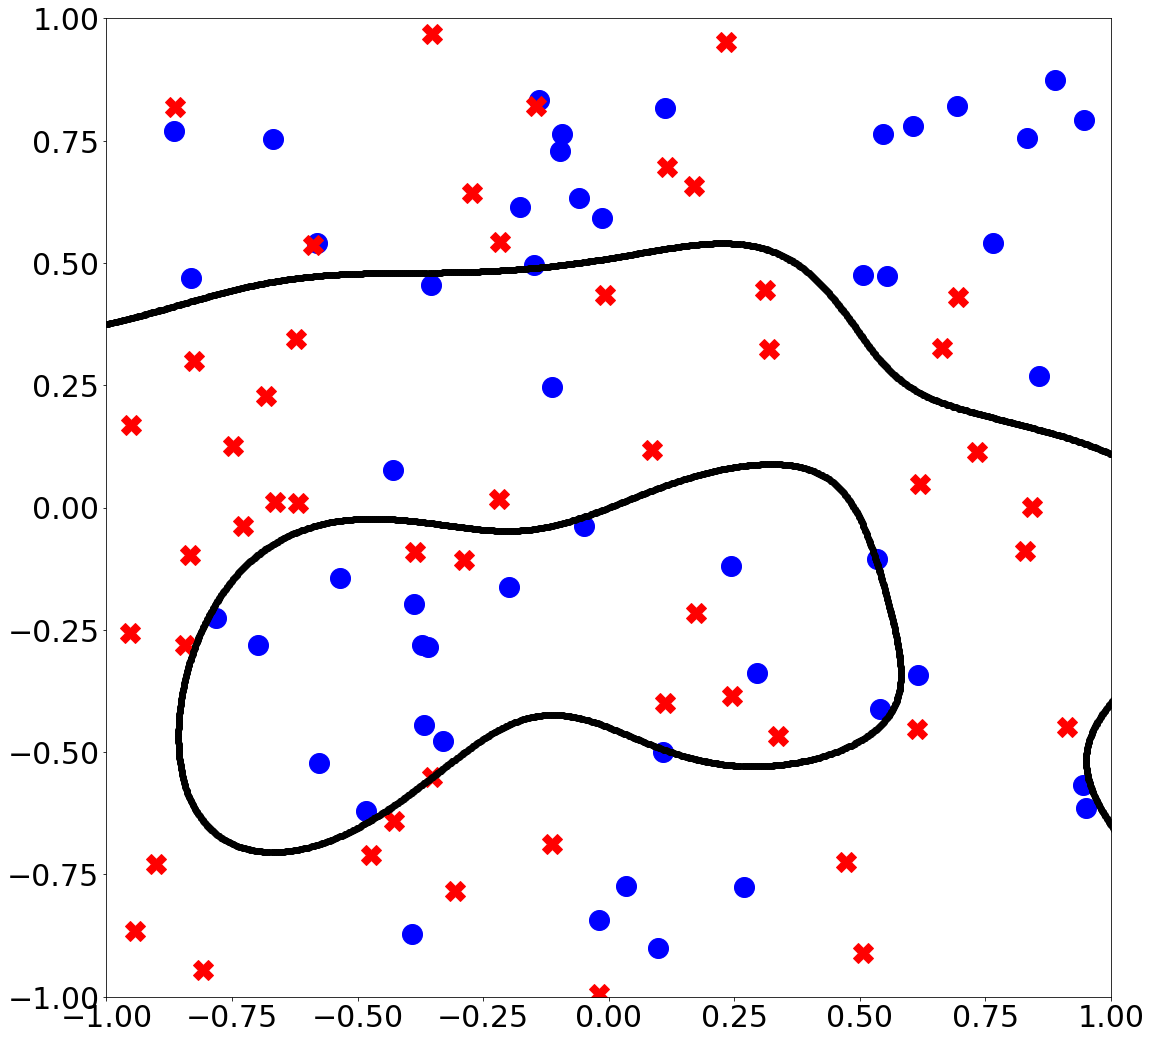

In [48]:
w_6=np.zeros(28)
T=30000
error=compute_error(w_6,feat_x_6)
print(error)
for t in range(0,T):
    tmp_error=0
    error_x,error_y=search_error(w_6,feat_x_6)
    w_6=w_6+error_y*error_x
    tmp_error=compute_error(w_6,feat_x_6)
    if(tmp_error<error):
        error=tmp_error
        print(error)
        if(error==0):
            break
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(feat_x_6[:50,1],feat_x_6[:50,2],"bo",markersize=20)
plt.plot(feat_x_6[50:,1],feat_x_6[50:,2],"rX",markersize=20)
###### 這邊帶入x1求解 ######
x1=np.linspace(-f,f,500)
for i in range(0,len(x1)):
    A1=w_6[27]
    B1=w_6[20]+w_6[26]*x1[i]
    C1=w_6[14]+w_6[19]*x1[i]+w_6[25]*(x1[i]**2)
    D1=w_6[9]+w_6[13]*x1[i]+w_6[18]*(x1[i]**2)+w_6[24]*(x1[i]**3)
    E1=w_6[5]+w_6[8]*x1[i]+w_6[12]*(x1[i]**2)+w_6[17]*(x1[i]**3)+w_6[23]*(x1[i]**4)
    F1=w_6[2]+w_6[4]*x1[i]+w_6[7]*(x1[i]**2)+w_6[11]*(x1[i]**3)+w_6[16]*(x1[i]**4)+w_6[22]*(x1[i]**5)
    G1=w_6[0]+w_6[1]*x1[i]+w_6[3]*(x1[i]**2)+w_6[6]*(x1[i]**3)+w_6[10]*(x1[i]**4)+w_6[15]*(x1[i]**5)+w_6[21]*(x1[i]**6)
    temp=np.roots([A1,B1,C1,D1,E1,F1,G1])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(x1[i],tt.real,"ko")
        else:
            plt.plot(x1[i],tt,"ko")
###### 這邊帶入x2求解 ######
x2=np.linspace(-f,f,500)
for i in range(0,len(x2)):
    A2=w_6[21]
    B2=w_6[15]+w_6[22]*x2[i]
    C2=w_6[10]+w_6[16]*x2[i]+w_6[23]*(x2[i]**2)
    D2=w_6[6]+w_6[11]*x2[i]+w_6[17]*(x2[i]**2)+w_6[24]*(x2[i]**3)
    E2=w_6[3]+w_6[7]*x2[i]+w_6[12]*(x2[i]**2)+w_6[18]*(x2[i]**3)+w_6[25]*(x2[i]**4)
    F2=w_6[1]+w_6[4]*x2[i]+w_6[8]*(x2[i]**2)+w_6[13]*(x2[i]**3)+w_6[19]*(x2[i]**4)+w_6[26]*(x2[i]**5)
    G2=w_6[0]+w_6[2]*x2[i]+w_6[5]*(x2[i]**2)+w_6[9]*(x2[i]**3)+w_6[14]*(x2[i]**4)+w_6[20]*(x2[i]**5)+w_6[27]*(x2[i]**6)
    temp=np.roots([A2,B2,C2,D2,E2,F2,G2])
    for tt in temp:
        if isinstance(tt,complex):
            if(tt.imag==0):
                plt.plot(tt.real,x2[i],"ko")
        else:
             plt.plot(tt,x2[i],"ko")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.show()